In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data downloaded from github 
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df.columns
#checking the column names

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:>

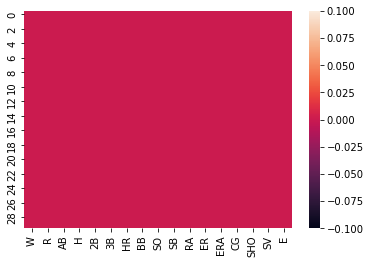

In [4]:
sns.heatmap(df.isnull())
#checking the null values using heatmap,showing there are many in outlet size and item weight , so to check this in values we will use below command

In [5]:
df.isnull().sum()
# checking the count of null values, there are no nulls

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.dtypes
#we dont require encoding to convert oject into float

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
df.describe()
#The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

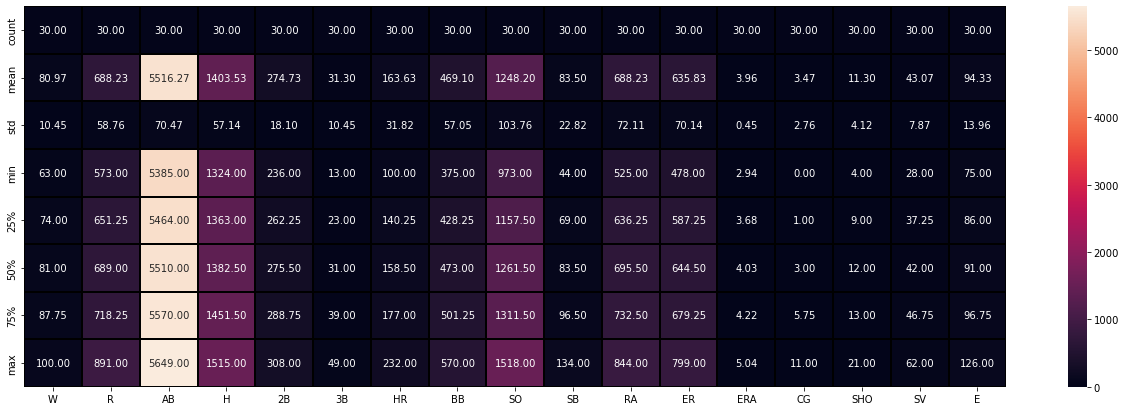

In [8]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [9]:
df.shape
#data has 17 columns and 30 rows

(30, 17)

In [10]:
#now we will check correlation using tables and charts
dfcorr=df.corr()
dfcorr


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

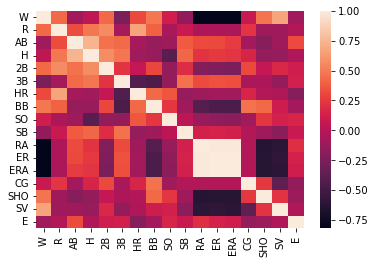

In [11]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [12]:
#Here using diff chart and below table can see very low corr of CG,H,AB,E,SB,3B,ER,RA,ERA with W so we will drop them
dfcorr["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [13]:
df1=df.drop(['CG','H','AB','E','SB','3B','ER','RA','ERA'],axis=1)
df1

,W,R,2B,HR,BB,SO,SHO,SV
0,95,724,300,139,383,973,8,56
1,83,696,277,156,439,1264,12,45
2,81,669,303,141,533,1157,10,38
3,76,622,260,136,404,1231,9,37
4,74,689,289,151,455,1259,12,35
5,93,891,308,232,570,1151,10,34
6,87,764,272,212,554,1227,4,48
7,81,713,246,217,418,1331,10,43
8,80,644,278,167,436,1310,12,60
9,78,748,294,161,478,1148,10,40


In [14]:
df1.columns

Index(['W', 'R', '2B', 'HR', 'BB', 'SO', 'SHO', 'SV'], dtype='object')

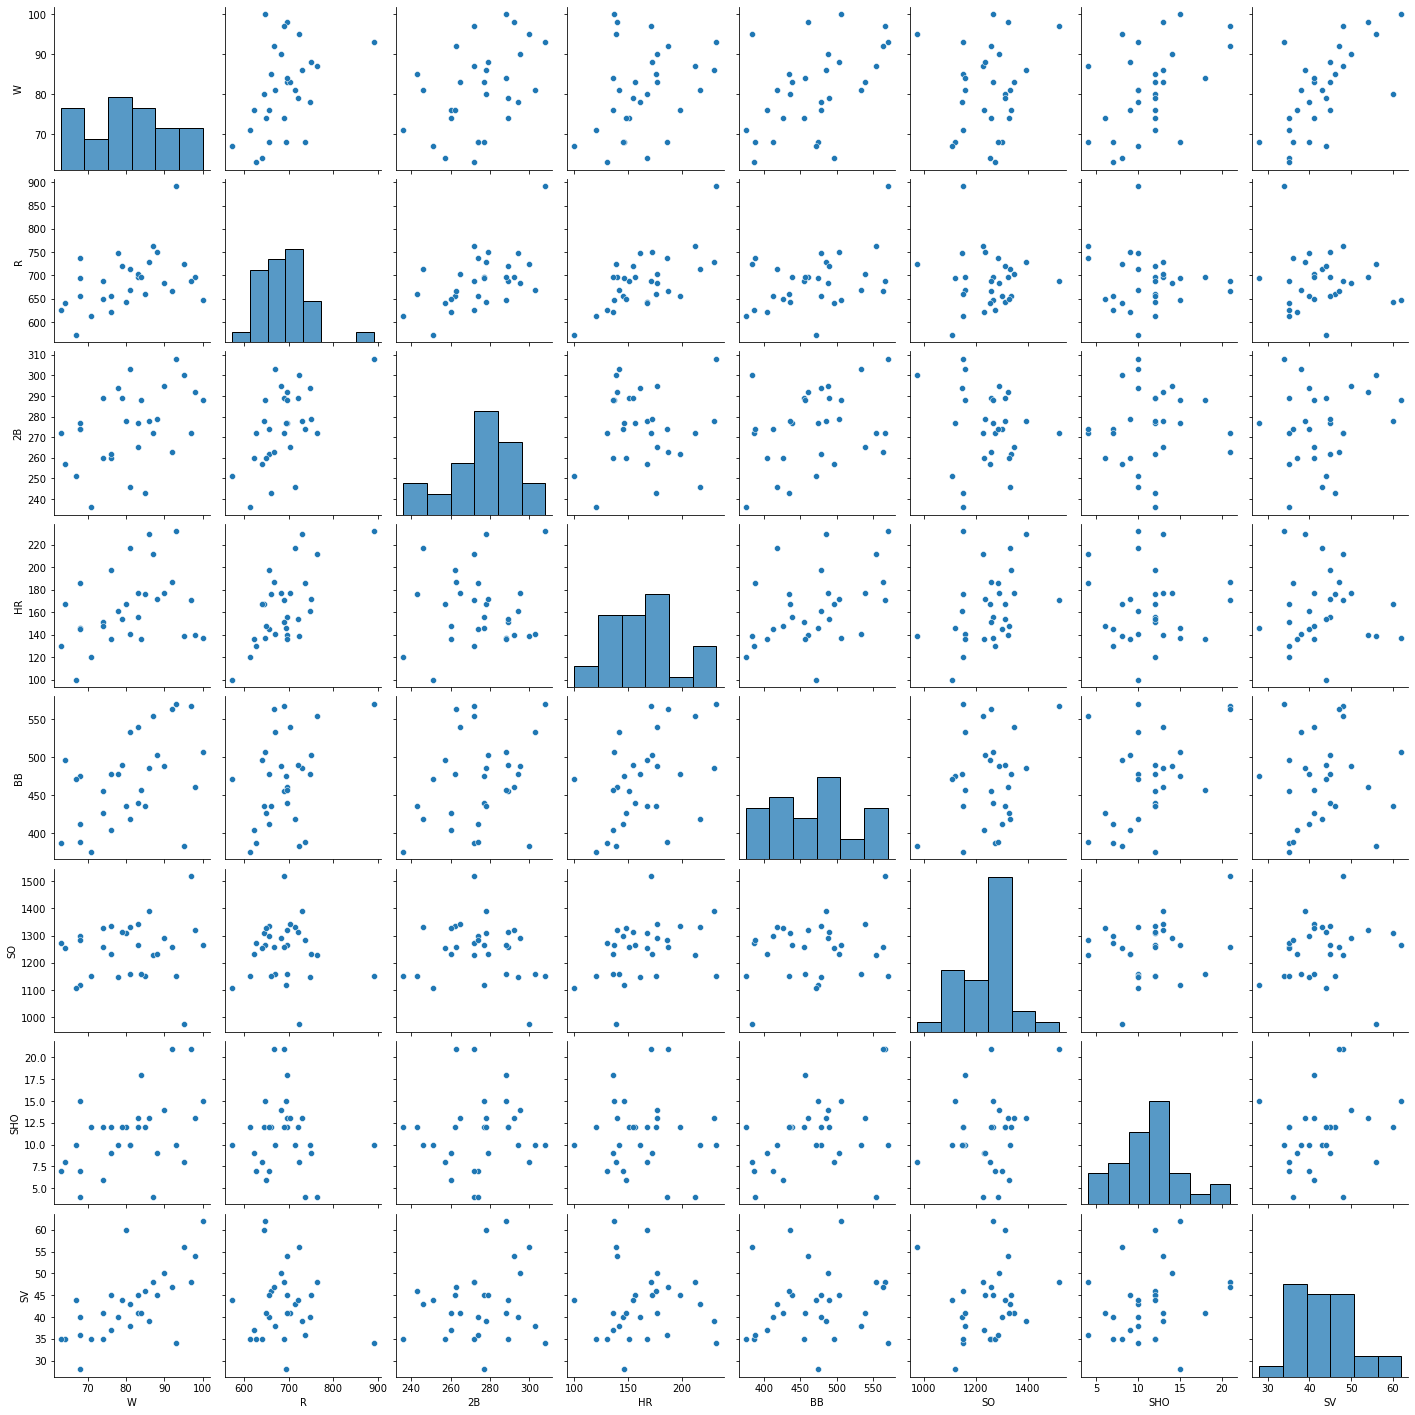

In [15]:
sns.pairplot(df1)
#to visually see positive , negative colrrelat

<AxesSubplot:xlabel='W', ylabel='Density'>

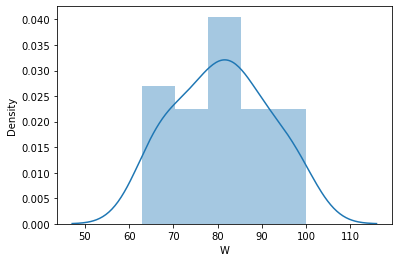

In [16]:
#we will check the data distribution using distplots
sns.distplot(df1['W'])

<AxesSubplot:xlabel='R', ylabel='Density'>

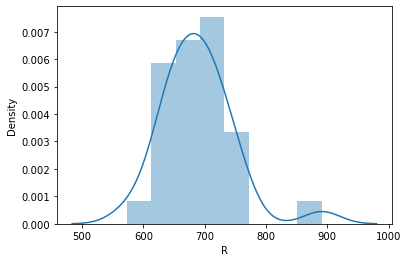

In [17]:
sns.distplot(df1['R'])

<AxesSubplot:xlabel='2B', ylabel='Density'>

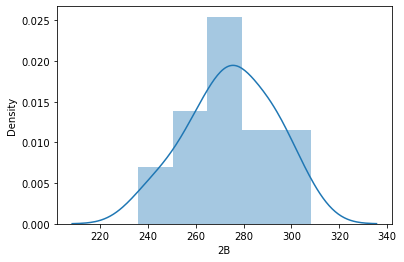

In [18]:
sns.distplot(df1['2B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

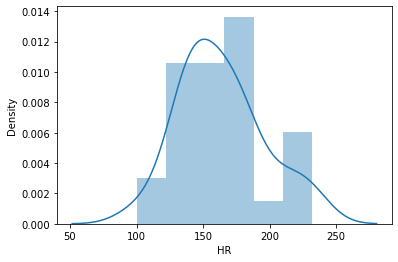

In [19]:
sns.distplot(df1['HR'])

<AxesSubplot:xlabel='BB', ylabel='Density'>

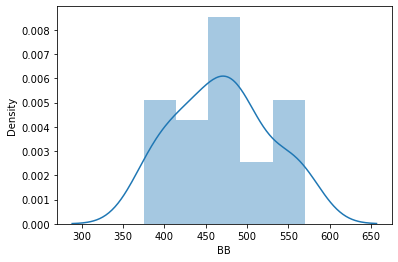

In [20]:
sns.distplot(df1['BB'])

<AxesSubplot:xlabel='SO', ylabel='Density'>

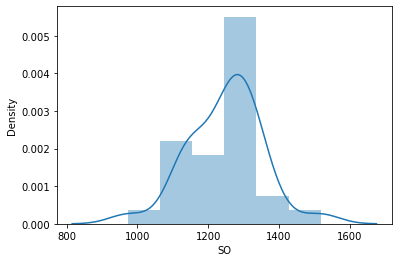

In [21]:
sns.distplot(df1['SO'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

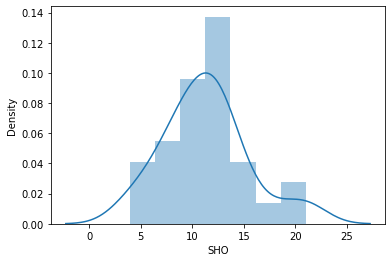

In [22]:
sns.distplot(df1['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

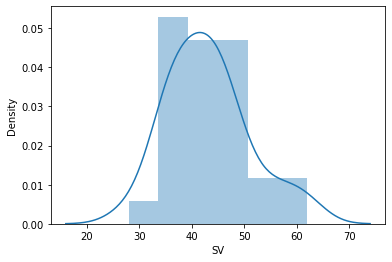

In [23]:
sns.distplot(df1['SV'])

W         AxesSubplot(0.125,0.536818;0.110714x0.343182)
R      AxesSubplot(0.257857,0.536818;0.110714x0.343182)
2B     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
HR     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
BB     AxesSubplot(0.656429,0.536818;0.110714x0.343182)
SO     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
SHO          AxesSubplot(0.125,0.125;0.110714x0.343182)
SV        AxesSubplot(0.257857,0.125;0.110714x0.343182)
dtype: object

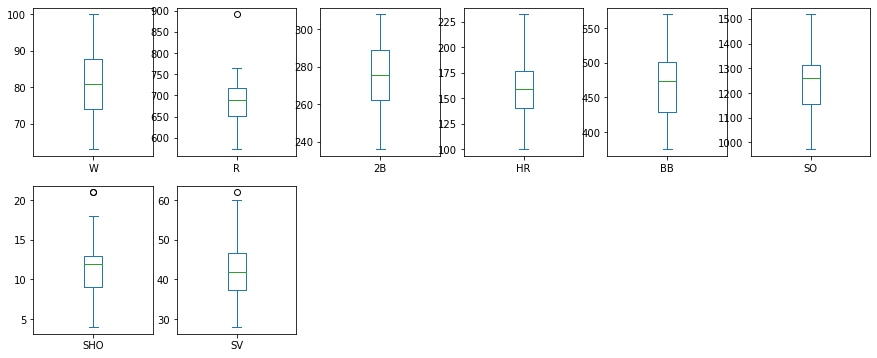

In [24]:
df1.plot(kind='box',subplots=True,layout=(2,6),figsize=(15,6))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

In [25]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,W,R,2B,HR,BB,SO,SHO,SV
0,1.365409,0.619078,1.420173,0.787299,1.534902,2.697630,0.814629,1.671607
1,0.197838,0.134432,0.127403,0.243967,0.536592,0.154878,0.172800,0.249879
2,0.003243,0.332906,1.588795,0.723377,1.139144,0.893982,0.320914,0.654856
3,0.483244,1.146419,0.828122,0.883181,1.160536,0.168602,0.567771,0.784104
4,0.677839,0.013270,0.801892,0.403770,0.251360,0.105866,0.172800,1.042600
5,1.170814,3.509647,1.869832,2.185047,1.798742,0.952796,0.320914,1.171848
6,0.587028,1.311430,0.153633,1.545833,1.513510,0.207812,1.802057,0.637623
7,0.003243,0.428681,1.615025,1.705636,0.910958,0.811641,0.320914,0.008617
8,0.094054,0.765626,0.183611,0.107601,0.590073,0.605790,0.172800,2.188598
9,0.288649,1.034489,1.082929,0.084163,0.158660,0.982204,0.320914,0.396360


In [26]:
z=np.abs(zscore(df1))

In [27]:
z.shape

(30, 8)

In [28]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [29]:
len(np.where(z>3)[0])

1

In [30]:
df2=df1[(z<3).all(axis=1)]

In [31]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (30, 8)
new dataframe (29, 8)
total dropped 1


In [32]:
loss_percent=(30-29)/30*100
print(loss_percent,"%")
#here by removing the outliers loosign 3.3% of data which is fine as it will help in gettign better model accuracy

3.3333333333333335 %


In [33]:
#we will now check skewness in data
df2.skew()

W      0.119013
R     -0.215364
2B    -0.335304
HR     0.450862
BB     0.151193
SO    -0.233815
SHO    0.526943
SV     0.627480
dtype: float64

In [34]:
# We will break data into input and output and then remove skewness
x=df2.drop("W",axis=1)
y=df2["W"]

In [35]:
x

,R,2B,HR,BB,SO,SHO,SV
0,724,300,139,383,973,8,56
1,696,277,156,439,1264,12,45
2,669,303,141,533,1157,10,38
3,622,260,136,404,1231,9,37
4,689,289,151,455,1259,12,35
6,764,272,212,554,1227,4,48
7,713,246,217,418,1331,10,43
8,644,278,167,436,1310,12,60
9,748,294,161,478,1148,10,40
10,751,279,172,503,1233,9,45


In [36]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [37]:
#checking vif to identify multicollinierity and can see below that no column is similarly correlated
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)
#There is no multicollinierity so need to drop any column further

,Variables,VIF Factor
0,R,616.825378
1,2B,531.375265
2,HR,92.959020
3,BB,122.849547
4,SO,149.921055
5,SHO,12.372992
6,SV,38.354930


In [38]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [39]:
x1=power_transform(x,method='yeo-johnson')
pd.DataFrame(x1).skew()

0   -0.024842
1   -0.052793
2    0.000448
3   -0.008572
4    0.051530
5    0.000529
6   -0.000925
dtype: float64

In [43]:
# as we have now removed the skewness , let form the modekl using Linear Regression as the output is a continues variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [45]:
#finding best random state
from sklearn.metrics import r2_score
maxr2=0
maxRS=0
lr=LinearRegression()
for i in range(0,100):
    x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    lr.fit(x1_train,y_train)
    predlr=lr.predict(x1_test)
    r2score=r2_score(y_test,predlr)
    print('r2score',r2score,'randome state',i)
    if r2score>maxr2:
        maxr2=r2score
        maxRS=i
        
print("Best r2 score is",maxr2,"on Random State",maxRS)


r2score 0.7580781857939415 randome state 0
r2score 0.9223059479531254 randome state 1
r2score 0.3406732162318308 randome state 2
r2score 0.7539746200052334 randome state 3
r2score 0.707365018344732 randome state 4
r2score 0.25895710023044594 randome state 5
r2score 0.746300057374655 randome state 6
r2score 0.12549007759899844 randome state 7
r2score 0.774329192243093 randome state 8
r2score 0.12299926301474762 randome state 9
r2score -0.4113167130475155 randome state 10
r2score -0.097873690040019 randome state 11
r2score 0.28832457229730424 randome state 12
r2score 0.732909673615791 randome state 13
r2score 0.23644128778989215 randome state 14
r2score 0.8445277935738719 randome state 15
r2score -0.35106954726983153 randome state 16
r2score 0.5975598427214858 randome state 17
r2score 0.6300899671611073 randome state 18
r2score 0.6951384226147663 randome state 19
r2score 0.830053199926502 randome state 20
r2score 0.31302036795122257 randome state 21
r2score 0.6965232451805392 randome sta

In [46]:
#We will go with random state 3,7,17
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=1)
lr.fit(x1_train,y_train)
predlr=lr.predict(x1_test)
print(r2_score(y_test,predlr))
cvscore=cross_val_score(lr,x1,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.9223059479531254
cross val score: -0.08128289596346891


In [47]:
#Hypertuning , getting best parameters
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x1_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [48]:
#applying the same parameters
ls=Lasso(alpha=1,random_state=0)
ls.fit(x1_train,y_train)
ls.score(x1_train,y_train)
pred_ls=ls.predict(x1_test)
lss=r2_score(y_test,pred_ls)
lss
cvscore1=cross_val_score(ls,x1,y,cv=5)
cvm1=cvscore1.mean()
print("accuracy score",lss)
print("cross val score:",cvm1)

accuracy score 0.865590133028216
cross val score: 0.06486841446229748


In [49]:
#Trying with Ridge regression technique for hypertuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
cl=GridSearchCV(rd,parameters)
cl.fit(x1_train,y_train)
print(cl.best_params_)

{'alpha': 10, 'random_state': 0}


In [50]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(x1_train,y_train)
rd.score(x1_train,y_train)
pred_rd=rd.predict(x1_test)
rdd=r2_score(y_test,pred_rd)
cvscore2=cross_val_score(rd,x1,y,cv=5)
cvm2=cvscore2.mean()
print("accuracy score",rdd)
print("cross val score:",cvm2)

accuracy score 0.8009572459494116
cross val score: 0.094042937372528


In [51]:
#We will check more models to see if we can still get better result for more improvement
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x1_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [52]:
#Applying the crieterias
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x1_train,y_train)
rf.score(x1_train,y_train)
pred_decision=rf.predict(x1_test)
rfs=r2_score(y_test,pred_decision)
cvs3=cross_val_score(rf,x1,y,cv=5)
cvm3=cvs3.mean()
print("accuracy score",rfs)
print("cross val score:",cvm3)

accuracy score 0.6351601431980907
cross val score: -0.3594299521189525


In [53]:
#above gives better % accuracy and cross val score as well and they are very close to each other
#than previous methods so we will save this model
import pickle

In [54]:
filename='basket.pkl'
pickle.dump(rd,open(filename,'wb'))

In [55]:
#Conclusion 
loaded_model=pickle.load(open('basket.pkl','rb'))
result=loaded_model.score(x1_test,y_test)
print(result)
                        

0.8009572459494116


Ridge Regression with Alpha value 10 and random state 0 provides 80% R2 Score hence we will select this model and save

In [56]:
#predicting the wins using the model saved
conclusion=pd.DataFrame([loaded_model.predict(x1_test)[:],pred_rd[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5
Predicted,90.512444,67.621693,71.810799,83.038779,83.467364,87.980747
Original,90.512444,67.621693,71.810799,83.038779,83.467364,87.980747
